# Data Wrangling with Spark

This is the code used in the previous screencast. Run each code cell to understand what the code does and how it works.

These first three cells import libraries, instantiate a SparkSession, and then read in the data set

In [7]:
import findspark
import os

findspark.init(os.environ['SPARK_HOME'])

In [17]:
from pyspark.sql import SparkSession
import pyspark.sql.functions as F

In [9]:
spark = SparkSession.builder.appName('Wrangling Data').getOrCreate()

In [10]:
user_log = spark.read.json('./data/sparkify_log_small.json')

# Data Exploration 

The next cells explore the data set.

In [11]:
user_log.printSchema()

root
 |-- artist: string (nullable = true)
 |-- auth: string (nullable = true)
 |-- firstName: string (nullable = true)
 |-- gender: string (nullable = true)
 |-- itemInSession: long (nullable = true)
 |-- lastName: string (nullable = true)
 |-- length: double (nullable = true)
 |-- level: string (nullable = true)
 |-- location: string (nullable = true)
 |-- method: string (nullable = true)
 |-- page: string (nullable = true)
 |-- registration: long (nullable = true)
 |-- sessionId: long (nullable = true)
 |-- song: string (nullable = true)
 |-- status: long (nullable = true)
 |-- ts: long (nullable = true)
 |-- userAgent: string (nullable = true)
 |-- userId: string (nullable = true)



In [12]:
user_log.take(5)

[Row(artist='Showaddywaddy', auth='Logged In', firstName='Kenneth', gender='M', itemInSession=112, lastName='Matthews', length=232.93342, level='paid', location='Charlotte-Concord-Gastonia, NC-SC', method='PUT', page='NextSong', registration=1509380319284, sessionId=5132, song='Christmas Tears Will Fall', status=200, ts=1513720872284, userAgent='"Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/36.0.1985.125 Safari/537.36"', userId='1046'),
 Row(artist='Lily Allen', auth='Logged In', firstName='Elizabeth', gender='F', itemInSession=7, lastName='Chase', length=195.23873, level='free', location='Shreveport-Bossier City, LA', method='PUT', page='NextSong', registration=1512718541284, sessionId=5027, song='Cheryl Tweedy', status=200, ts=1513720878284, userAgent='"Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/36.0.1985.143 Safari/537.36"', userId='1000'),
 Row(artist='Cobra Starship Featuring Leighton Meester', auth='Logged In', firstNa

In [13]:
# show statistics of all columns
user_log.describe().show()

+-------+-----------------+----------+---------+------+------------------+--------+-----------------+-----+------------+------+-------+--------------------+------------------+--------+-----------------+-------------------+--------------------+------------------+
|summary|           artist|      auth|firstName|gender|     itemInSession|lastName|           length|level|    location|method|   page|        registration|         sessionId|    song|           status|                 ts|           userAgent|            userId|
+-------+-----------------+----------+---------+------+------------------+--------+-----------------+-----+------------+------+-------+--------------------+------------------+--------+-----------------+-------------------+--------------------+------------------+
|  count|             8347|     10000|     9664|  9664|             10000|    9664|             8347|10000|        9664| 10000|  10000|                9664|             10000|    8347|            10000|         

In [14]:
# show statistics of selected columns
user_log.describe(['artist', 'sessionId']).show()

+-------+-----------------+------------------+
|summary|           artist|         sessionId|
+-------+-----------------+------------------+
|  count|             8347|             10000|
|   mean|            461.0|         4436.7511|
| stddev|            300.0|2043.1281541827561|
|    min|              !!!|                 9|
|    max|ÃÂlafur Arnalds|              7144|
+-------+-----------------+------------------+



In [15]:
# return total number of records
user_log.count()

10000

In [16]:
user_log.select('page').dropDuplicates().sort('page').show()

+----------------+
|            page|
+----------------+
|           About|
|       Downgrade|
|           Error|
|            Help|
|            Home|
|           Login|
|          Logout|
|        NextSong|
|   Save Settings|
|        Settings|
|Submit Downgrade|
|  Submit Upgrade|
|         Upgrade|
+----------------+



In [18]:
user_log.select(["userId", "firstname", "page", "song"]).filter(F.col('userId') == '1046').show()

+------+---------+--------+--------------------+
|userId|firstname|    page|                song|
+------+---------+--------+--------------------+
|  1046|  Kenneth|NextSong|Christmas Tears W...|
|  1046|  Kenneth|NextSong|  Be Wary Of A Woman|
|  1046|  Kenneth|NextSong|   Public Enemy No.1|
|  1046|  Kenneth|NextSong|Reign Of The Tyrants|
|  1046|  Kenneth|NextSong|      Father And Son|
|  1046|  Kenneth|NextSong|               No. 5|
|  1046|  Kenneth|NextSong|           Seventeen|
|  1046|  Kenneth|    Home|                null|
|  1046|  Kenneth|NextSong|          War on war|
|  1046|  Kenneth|NextSong|   Killermont Street|
|  1046|  Kenneth|NextSong|        Black & Blue|
|  1046|  Kenneth|  Logout|                null|
|  1046|  Kenneth|    Home|                null|
|  1046|  Kenneth|NextSong|     Heads Will Roll|
|  1046|  Kenneth|NextSong|Bleed It Out [Liv...|
|  1046|  Kenneth|NextSong|              Clocks|
|  1046|  Kenneth|NextSong|           Love Rain|
|  1046|  Kenneth|Ne

In [19]:
user_log.select(["userId", "firstname", "page", "song"]).filter(F.col('userId') == '1046').collect()

[Row(userId='1046', firstname='Kenneth', page='NextSong', song='Christmas Tears Will Fall'),
 Row(userId='1046', firstname='Kenneth', page='NextSong', song='Be Wary Of A Woman'),
 Row(userId='1046', firstname='Kenneth', page='NextSong', song='Public Enemy No.1'),
 Row(userId='1046', firstname='Kenneth', page='NextSong', song='Reign Of The Tyrants'),
 Row(userId='1046', firstname='Kenneth', page='NextSong', song='Father And Son'),
 Row(userId='1046', firstname='Kenneth', page='NextSong', song='No. 5'),
 Row(userId='1046', firstname='Kenneth', page='NextSong', song='Seventeen'),
 Row(userId='1046', firstname='Kenneth', page='Home', song=None),
 Row(userId='1046', firstname='Kenneth', page='NextSong', song='War on war'),
 Row(userId='1046', firstname='Kenneth', page='NextSong', song='Killermont Street'),
 Row(userId='1046', firstname='Kenneth', page='NextSong', song='Black & Blue'),
 Row(userId='1046', firstname='Kenneth', page='Logout', song=None),
 Row(userId='1046', firstname='Kenneth'

# Calculating Statistics by Hour

In [20]:
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [21]:
#datetime.datetime.fromtimestamp(epoch_time): convert epoch time (i.e. UNIX timestamp) to date time
get_hour = F.udf(lambda x: datetime.fromtimestamp(x/1000).hour)

In [22]:
# .withColumn(): modify or add a column in the Spark dataframe
user_log = user_log.withColumn('hour', get_hour(F.col('ts')))

In [24]:
user_log.head()

Row(artist='Showaddywaddy', auth='Logged In', firstName='Kenneth', gender='M', itemInSession=112, lastName='Matthews', length=232.93342, level='paid', location='Charlotte-Concord-Gastonia, NC-SC', method='PUT', page='NextSong', registration=1509380319284, sessionId=5132, song='Christmas Tears Will Fall', status=200, ts=1513720872284, userAgent='"Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/36.0.1985.125 Safari/537.36"', userId='1046', hour='9')

In [25]:
song_in_hour = user_log.filter(F.col('page') == 'NextSong') \
                       .groupBy('hour').count() \
                       .orderBy(F.col('count').cast('int'))  # .cast() convert data type

In [27]:
song_in_hour.show(5)

+----+-----+
|hour|count|
+----+-----+
|  21|  216|
|  22|  228|
|   8|  248|
|  20|  249|
|  23|  251|
+----+-----+
only showing top 5 rows



In [28]:
# Convert Spark Dataframe into pandas Dataframe
song_in_hour_pd = song_in_hour.toPandas()
song_in_hour_pd.head()

,hour,count
0,21,216
1,22,228
2,8,248
3,20,249
4,23,251


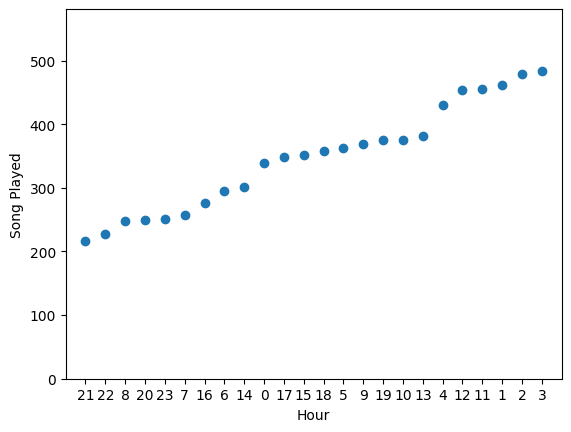

In [32]:
plt.scatter(x=song_in_hour_pd['hour'], y=song_in_hour_pd['count'])
plt.xlim(-1, 24)
plt.ylim(0, max(song_in_hour_pd['count']) * 1.2)
plt.xlabel('Hour')
plt.ylabel('Song Played')
plt.show()

# Drop Rows with Missing Values

As you'll see, it turns out there are no missing values in the userID or session columns. But there are userID values that are empty strings.

In [34]:
# how = 'any': drop the records that have None in any of the specified columns
# how = 'all': drop the records that have None in all of the specified columns
user_log_valid = user_log.na.drop(how='any', subset=['userId', 'sessionId'])

In [35]:
user_log_valid.count()

10000

In [36]:
user_log_valid.select('userId').dropDuplicates().sort('userId').show(5)

+------+
|userId|
+------+
|      |
|    10|
|   100|
|  1000|
|  1003|
+------+
only showing top 5 rows



In [38]:
user_log_valid = user_log_valid.filter(F.col('userId') != '')

In [39]:
user_log_valid.count()

9664

# Users Downgrade Their Accounts

Find when users downgrade their accounts and then flag those log entries. Then use a window function and cumulative sum to distinguish each user's data as either pre or post downgrade events.

In [40]:
user_log_valid.filter(F.col('page') == 'Submit Downgrade').show()

+------+---------+---------+------+-------------+--------+------+-----+--------------------+------+----------------+-------------+---------+----+------+-------------+--------------------+------+----+
|artist|     auth|firstName|gender|itemInSession|lastName|length|level|            location|method|            page| registration|sessionId|song|status|           ts|           userAgent|userId|hour|
+------+---------+---------+------+-------------+--------+------+-----+--------------------+------+----------------+-------------+---------+----+------+-------------+--------------------+------+----+
|  null|Logged In|    Kelly|     F|           24|  Newton|  null| paid|Houston-The Woodl...|   PUT|Submit Downgrade|1513283366284|     5931|null|   307|1513768454284|Mozilla/5.0 (Wind...|  1138|  22|
+------+---------+---------+------+-------------+--------+------+-----+--------------------+------+----------------+-------------+---------+----+------+-------------+--------------------+------+----+


In [41]:
user_log_valid.select(["userId", "firstname", "page", "level", "song"]) \
              .where("userId = '1138'").collect()

[Row(userId='1138', firstname='Kelly', page='Home', level='paid', song=None),
 Row(userId='1138', firstname='Kelly', page='NextSong', level='paid', song='Everybody Everybody'),
 Row(userId='1138', firstname='Kelly', page='NextSong', level='paid', song='Gears'),
 Row(userId='1138', firstname='Kelly', page='NextSong', level='paid', song='Use Somebody'),
 Row(userId='1138', firstname='Kelly', page='NextSong', level='paid', song='Love Of My Life (1993 Digital Remaster)'),
 Row(userId='1138', firstname='Kelly', page='NextSong', level='paid', song='Down In The Valley Woe'),
 Row(userId='1138', firstname='Kelly', page='NextSong', level='paid', song='Treat Her Like A Lady'),
 Row(userId='1138', firstname='Kelly', page='NextSong', level='paid', song="Everybody Thinks You're An Angel"),
 Row(userId='1138', firstname='Kelly', page='NextSong', level='paid', song='Fourteen Wives'),
 Row(userId='1138', firstname='Kelly', page='NextSong', level='paid', song='Love On The Rocks'),
 Row(userId='1138', f

In [42]:
flag_downgrade_event = F.udf(lambda x: 1 if x == 'Submit Downgrade' else 0)

In [43]:
user_log_valid = user_log_valid.withColumn('downgraded', flag_downgrade_event(F.col('page')).cast('int'))

In [44]:
user_log_valid.head()

Row(artist='Showaddywaddy', auth='Logged In', firstName='Kenneth', gender='M', itemInSession=112, lastName='Matthews', length=232.93342, level='paid', location='Charlotte-Concord-Gastonia, NC-SC', method='PUT', page='NextSong', registration=1509380319284, sessionId=5132, song='Christmas Tears Will Fall', status=200, ts=1513720872284, userAgent='"Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/36.0.1985.125 Safari/537.36"', userId='1046', hour='9', downgraded=0)

In [45]:
from pyspark.sql import Window

In [48]:
# sum().over(): cumulative sum
# Window.unboundedPreceding: first row of the partition; Window.unboundedFollowing: last row of the partition
user_log_valid = user_log_valid.withColumn(
    'phase',
    F.sum(F.col('downgraded')).over(
        Window.partitionBy('userId').orderBy(F.desc('ts')) \
              .rowsBetween(Window.unboundedPreceding, 0)
    )
)

In [49]:
user_log_valid.select(["userId", "firstname", "ts", "page", "level", 'downgraded', "phase"]) \
              .where("userId = '1138'").sort('ts').collect()

[Row(userId='1138', firstname='Kelly', ts=1513729066284, page='Home', level='paid', downgraded=0, phase=1),
 Row(userId='1138', firstname='Kelly', ts=1513729066284, page='NextSong', level='paid', downgraded=0, phase=1),
 Row(userId='1138', firstname='Kelly', ts=1513729313284, page='NextSong', level='paid', downgraded=0, phase=1),
 Row(userId='1138', firstname='Kelly', ts=1513729552284, page='NextSong', level='paid', downgraded=0, phase=1),
 Row(userId='1138', firstname='Kelly', ts=1513729783284, page='NextSong', level='paid', downgraded=0, phase=1),
 Row(userId='1138', firstname='Kelly', ts=1513730001284, page='NextSong', level='paid', downgraded=0, phase=1),
 Row(userId='1138', firstname='Kelly', ts=1513730263284, page='NextSong', level='paid', downgraded=0, phase=1),
 Row(userId='1138', firstname='Kelly', ts=1513730518284, page='NextSong', level='paid', downgraded=0, phase=1),
 Row(userId='1138', firstname='Kelly', ts=1513730768284, page='NextSong', level='paid', downgraded=0, phase=